## **Dataset-1: Simulated a sine curve between 60 and 300 with some noise present**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

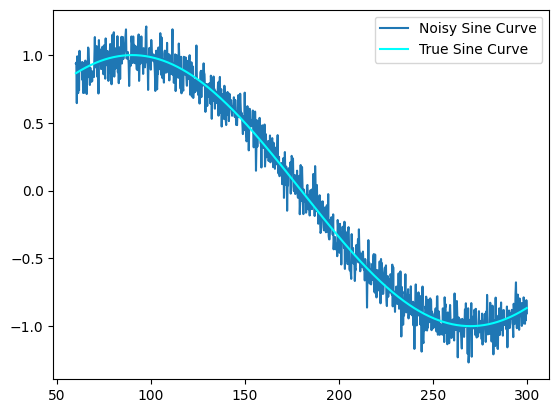

In [ ]:
x = np.linspace(60, 300, 1000)
y_true = np.sin(np.radians(x))
noise = np.random.normal(0, 0.1, len(x))
y = y_true + noise

plt.plot(x, y, label='Noisy Sine Curve')
plt.plot(x, y_true, color='cyan', label='True Sine Curve')
plt.legend()
plt.show()

### **Performed Linear Regression on Dataset 1 by computing cost function and gradient descent from scratch.**

In [ ]:
def cost_function(X, y, theta):
  m = len(X)
  y_pred = X.dot(theta)
  sq_error = (y_pred - y)**2
  cost = 1/(2*m) * np.sum(sq_error)
  return cost

In [ ]:
theta = np.zeros((2,1))
m =len(x)
X = np.append(np.ones((m,1)), x.reshape(m,1), axis=1)
y = y.reshape(m,1)
cost_function(X, y, theta)

0.3050757716048337

In [ ]:
def gradient_descent(X , y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose() , (y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(X, y, theta))
    return theta, costs

In [ ]:
theta , costs = gradient_descent(X , y, theta, alpha = 0.01, iterations=1)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x) = -0.0 + -0.53x1


## **Dataset-2:**



### **Performed Linear Regression on Dataset 2 by computing cost function and gradient descent from scratch.**

In [ ]:
df = pd.read_csv('/content/food_truck_data.txt')
df.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Population v/s Profit')

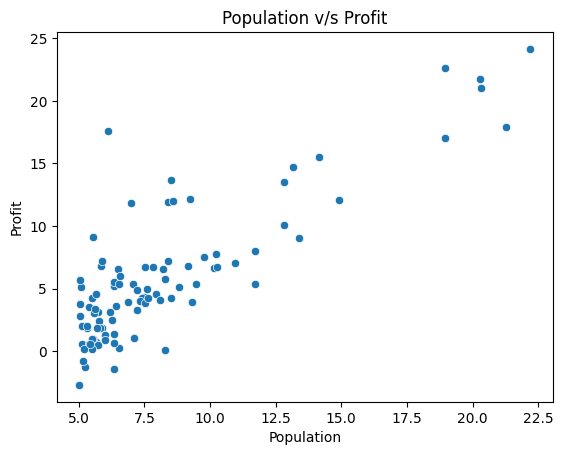

In [ ]:
ax = sns.scatterplot(x="Population", y="Profit", data=df)
ax.set_title("Population v/s Profit")

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    error = h - y
    cost = np.sum(error**2) / (2 * m)
    return cost

In [ ]:
m = df["Population"].size
X = np.append(np.ones((m,1)),df['Population'].values.reshape(m,1), axis=1)
y = df['Profit'].values.reshape(m,1)
theta = np.zeros((2, 1))

compute_cost(X,y,theta)

32.072733877455676

In [ ]:
def grad_desc(X, y, theta, alpha, iterations):
  m = len(y)
  cost = []
  for i in range(iterations):
    y_preds = np.dot(X, theta)
    error = np.dot(X.transpose(), (y_preds - y))
    theta -= alpha * 1/m * error
    cost.append(compute_cost(X,y,theta))
  return theta, cost

In [ ]:
theta , cost = grad_desc(X, y, theta, alpha=0.01, iterations=10)
print(f'h(x) = {format(str(round(theta[0,0],2)))} + {str(round(theta[1,0],2))}x1')

h(x) = 0.01 + 0.8x1


In [ ]:
def predict(X,theta):
  y_pred= np.dot(X, theta)
  return y_pred

In [ ]:
y_preds = predict(X, theta)

In [ ]:
theta

array([[0.0086469],
       [0.8007915]])

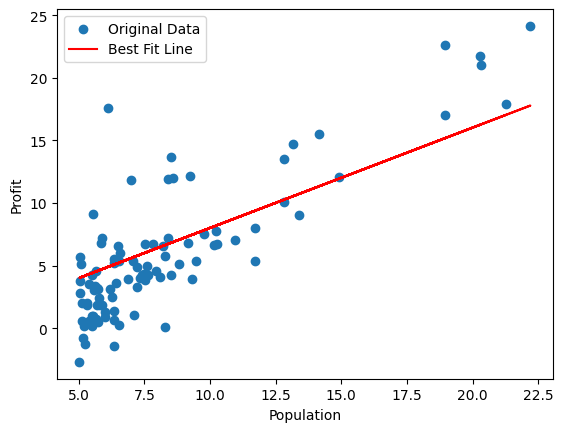

In [ ]:
plt.scatter(df['Population'], y, label='Original Data')
plt.plot(df['Population'], y_preds, color='red', label='Best Fit Line')

plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.show()

### **Used sklearn to perform linear regression on Dataset 2, showed the scatter plot for best fit line using matplotlib and show the results using MS**

Mean squared error: 8.953942751950358


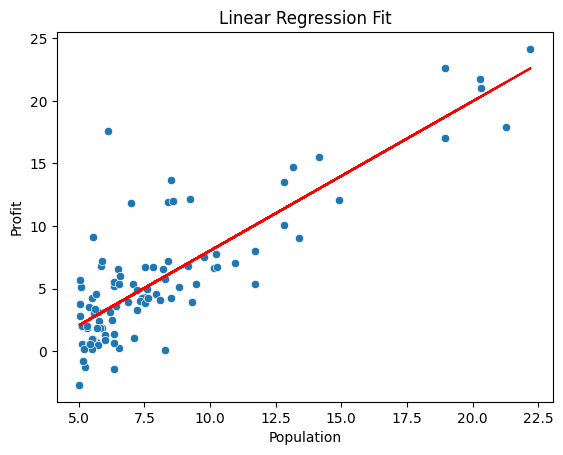

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(df[['Population']], df['Profit'])
y_pred = model.predict(df[['Population']])

mse = 1/(len(df['Profit'])) * np.sum((y_pred - df['Profit'])**2)
print("Mean squared error:", mse)

sns.scatterplot(x="Population", y="Profit", data = df)
plt.plot(df['Population'] , y_pred, color='red')
plt.title("Linear Regression Fit")
plt.show()

## **Dataset-3:**

### **Regularization on linear model build using Linear Regression**

In [ ]:
df2 = pd.read_csv("/content/home.csv")
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
cols = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'price']
df2 = df2[cols]
df2.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,price
0,1180,7,1180,1340,1.00,221900
1,2570,7,2170,1690,2.25,538000
2,770,6,770,2720,1.00,180000
3,1960,7,1050,1360,3.00,604000
4,1680,8,1680,1800,2.00,510000


In [ ]:
from sklearn.model_selection import train_test_split
X= df2.drop('price' , axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_train, y_train)

0.5469650463341185

In [ ]:
reg.score(X_test, y_test)

0.5380086697957835

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_train, y_train)

0.5469649017140152

In [ ]:
lasso_reg.score(X_test, y_test)

0.5380008774764631

In [ ]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_train, y_train)

0.5469621847258885

In [ ]:
ridge_reg.score(X_test, y_test)

0.537965377009923